In [1]:
import numpy as np
import h5py

#f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
#              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
#              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
#              +",FALSE,1/deeplift.imp_score.h5", "r")
f = h5py.File("deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
f_null = h5py.File("null.deeplift.imp_score.h5","r")
null_nanog_profile_wn_hypimp = np.array(f_null["hyp_imp/Nanog/profile/wn"][:])
null_onehot_seq = np.array(f_null["inputs/seq"][:])
null_nanog_profile_wn_contribs = null_nanog_profile_wn_hypimp*null_onehot_seq

In [3]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [4]:
null_nanog_profile_wn_contribs.shape

(4816, 1000, 4)

Fitting - on window size 5
Computing window sums
Done computing window sums
Subsampling!
Subsampling!
For increasing = True , the minimum IR precision was 0.49045760444234615 occurring at 0.0 implying a frac_neg of 0.962545234151869
For increasing = False , the minimum IR precision was 0.0 occurring at -6.948539521545172e-09 implying a frac_neg of 0.0
Adjusted frac neg is 0.95


/mnt/lab_data2/avanti/tfmodisco/modisco/coordproducers.py:430: RuntimeWarning: divide by zero encountered in double_scalars
  implied_frac_neg = -1/(1-(1/min_precision))


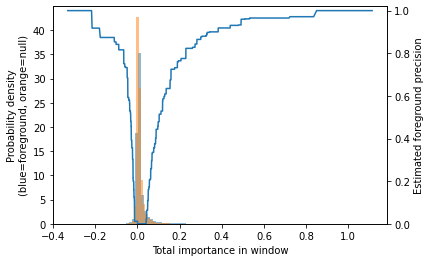

Fitting - on window size 9
Computing window sums
Done computing window sums
Subsampling!
Subsampling!
For increasing = True , the minimum IR precision was 0.4885320945243664 occurring at 0.0 implying a frac_neg of 0.9551568911641909
For increasing = False , the minimum IR precision was 0.0 occurring at -1.9979779608547688e-08 implying a frac_neg of 0.0
Adjusted frac neg is 0.95


/mnt/lab_data2/avanti/tfmodisco/modisco/coordproducers.py:430: RuntimeWarning: divide by zero encountered in double_scalars
  implied_frac_neg = -1/(1-(1/min_precision))


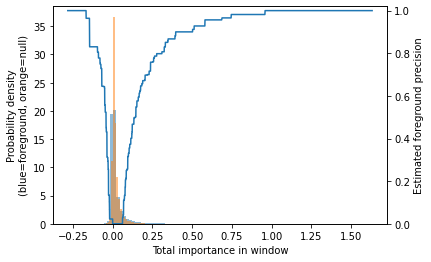

Fitting - on window size 13
Computing window sums
Done computing window sums
Subsampling!
Subsampling!
For increasing = True , the minimum IR precision was 0.4869914500105053 occurring at 0.0 implying a frac_neg of 0.9492852507438283
Adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.4803059234633458 occurring at -7.450580596923828e-09 implying a frac_neg of 0.9242089628271327
Adjusted frac neg is 0.95


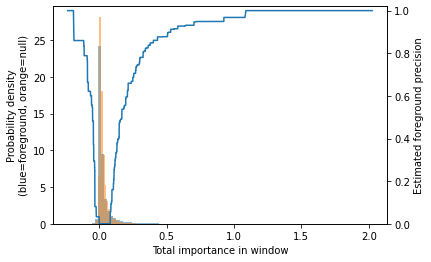

Fitting - on window size 17
Computing window sums
Done computing window sums
Subsampling!
Subsampling!
For increasing = True , the minimum IR precision was 0.339960710073081 occurring at 0.0 implying a frac_neg of 0.5150613232595929
Adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.4210076205070941 occurring at -2.086162567138672e-07 implying a frac_neg of 0.7271384484815185
Adjusted frac neg is 0.95


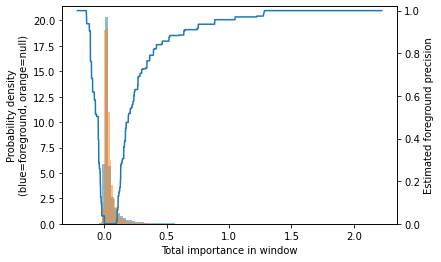

Fitting - on window size 21
Computing window sums
Done computing window sums
Subsampling!
Subsampling!
For increasing = True , the minimum IR precision was 0.4845572378249829 occurring at 0.0 implying a frac_neg of 0.940079623545966
Adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.33202726745696975 occurring at -1.4484976418316364e-07 implying a frac_neg of 0.49706709762375045
Adjusted frac neg is 0.95


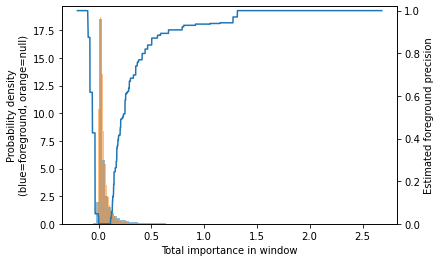

Subsampling!


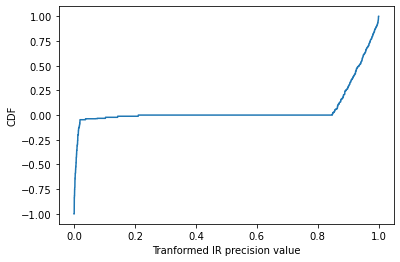

Thresholds from null dist were -0.99  and  0.99 with frac passing 0.000374
Passing windows frac was 0.000374 , which is below  0.03 ; adjusting
Got 113583 coords


In [11]:
from importlib import reload
import modisco
reload(modisco.coordproducers)
varwidth_coordproducer = modisco.coordproducers.VariableWindowAroundChunks(
    sliding=[5,9,13,17,21],
    flank=10, suppress=20, target_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.2,
    separate_pos_neg_thresholds=False,
    max_seqlets_total=None)
varwidth_coordproducerresults = varwidth_coordproducer(
    score_track=nanog_per_position_contrib_scores,
    null_track=null_per_position_contrib_scores)

In [12]:
#Load Ziga's results for this fold
import modisco
reload(modisco.coordproducers)
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
reload(modisco.tfmodisco_workflow)
reload(modisco)
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)


Getting the exemplar motifs
Numseqles: 4011


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.6s
[Parallel(n_jobs=10)]: Done 820 tasks      | elapsed:    8.2s
[Parallel(n_jobs=10)]: Done 2820 tasks      | elapsed:   12.3s
[Parallel(n_jobs=10)]: Done 4011 out of 4011 | elapsed:   14.6s finished


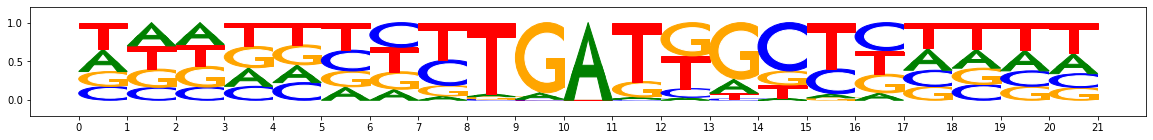

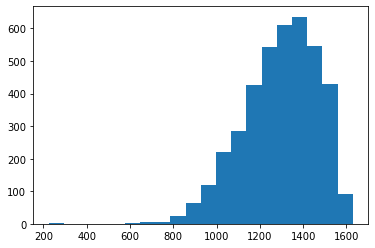

After filtering: numseqlets 3998


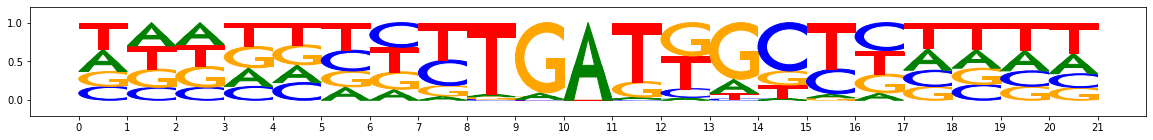

Numseqles: 2215


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 2020 tasks      | elapsed:    1.6s
[Parallel(n_jobs=10)]: Done 2215 out of 2215 | elapsed:    1.8s finished


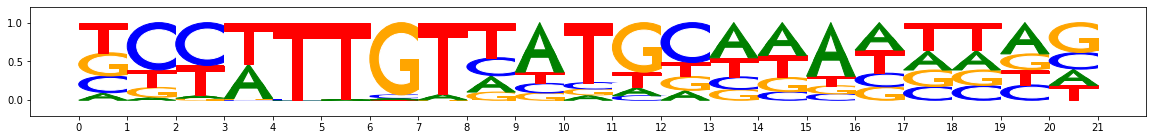

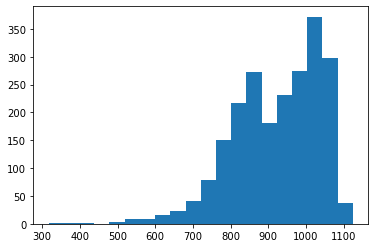

After filtering: numseqlets 2198


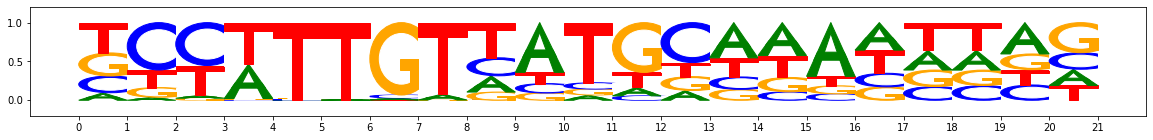

Numseqles: 1854


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1680 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 1854 out of 1854 | elapsed:    1.2s finished


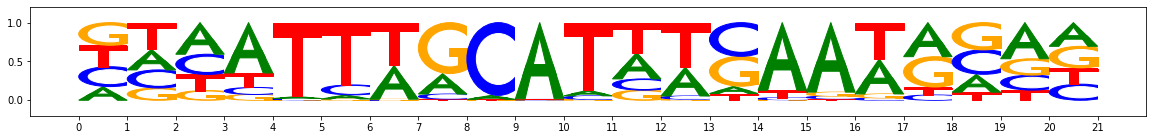

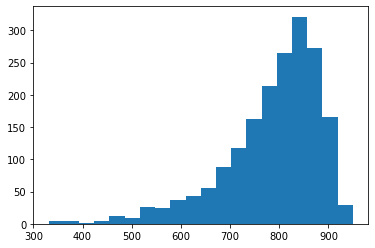

After filtering: numseqlets 1829


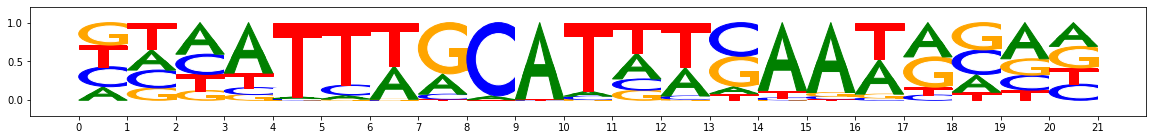

Numseqles: 1636


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1636 out of 1636 | elapsed:    0.9s finished


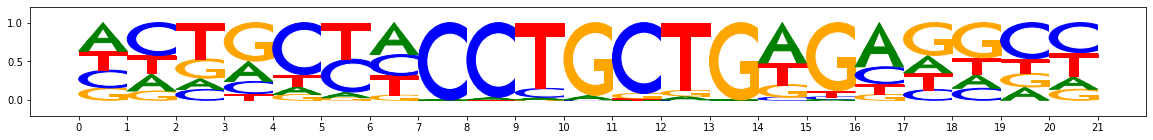

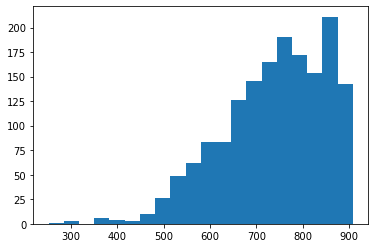

After filtering: numseqlets 1618


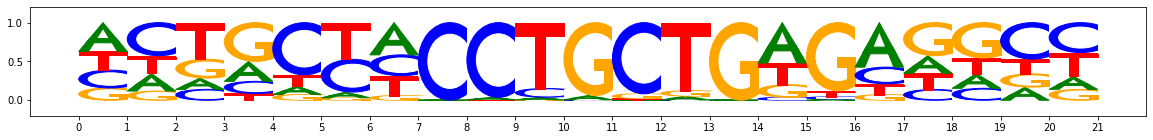

Numseqles: 937


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 860 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 937 out of 937 | elapsed:    0.6s finished


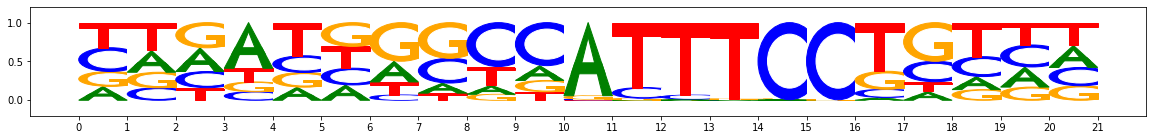

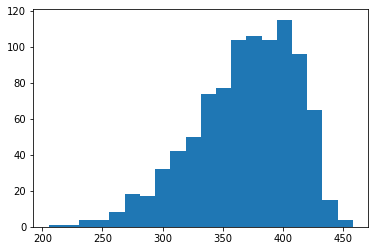

After filtering: numseqlets 935


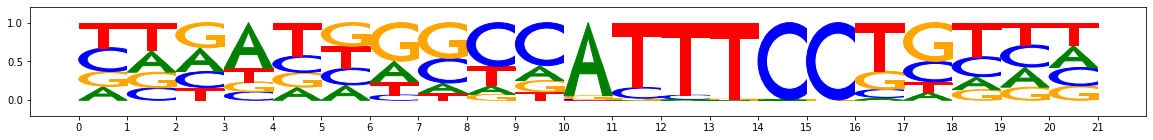

Numseqles: 749


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 700 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 749 out of 749 | elapsed:    0.5s finished


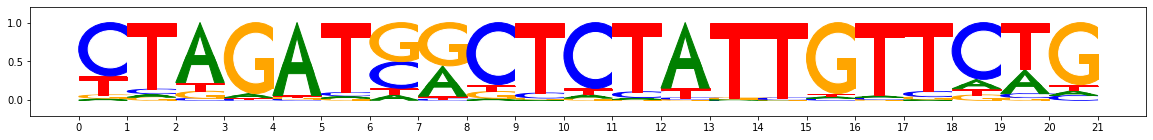

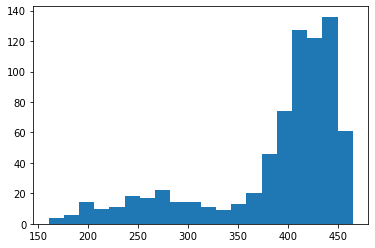

After filtering: numseqlets 692


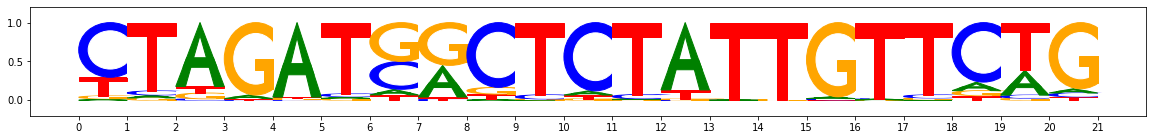

Numseqles: 466


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 466 out of 466 | elapsed:    0.2s finished


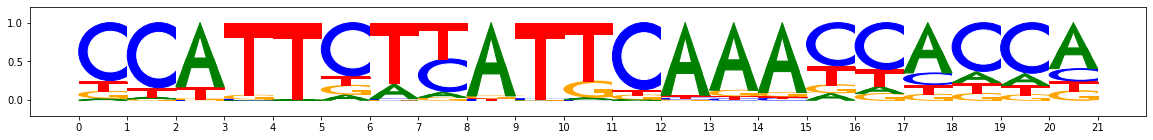

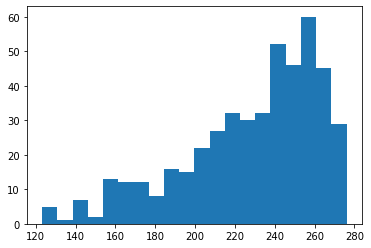

After filtering: numseqlets 455


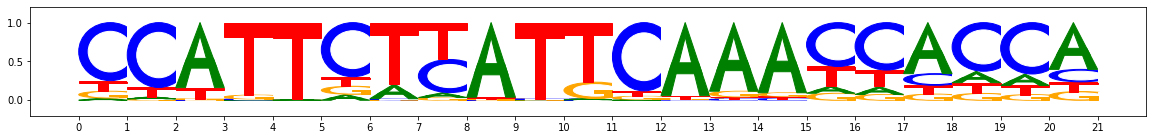

Numseqles: 231


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 231 out of 231 | elapsed:    0.1s finished


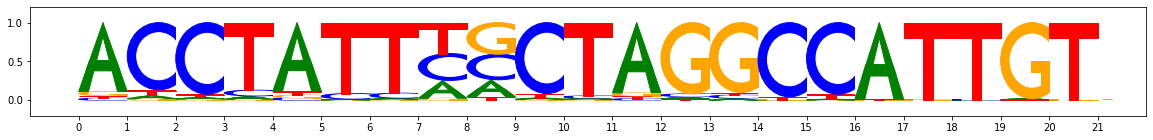

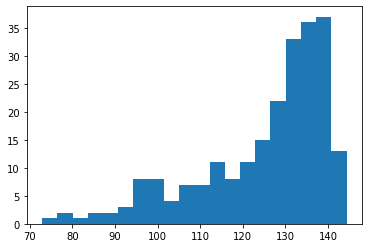

After filtering: numseqlets 228


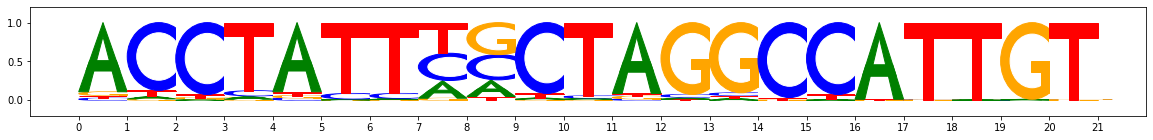

Numseqles: 191


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 191 out of 191 | elapsed:    0.1s finished


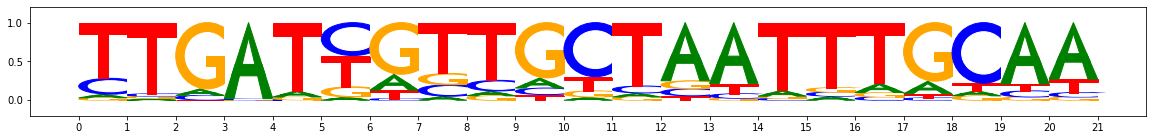

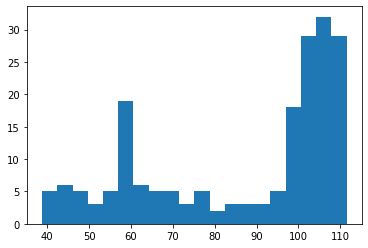

After filtering: numseqlets 152


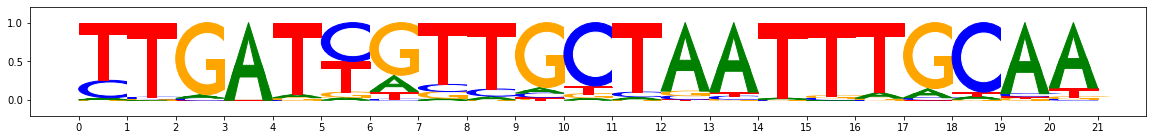

Numseqles: 187


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 187 out of 187 | elapsed:    0.1s finished


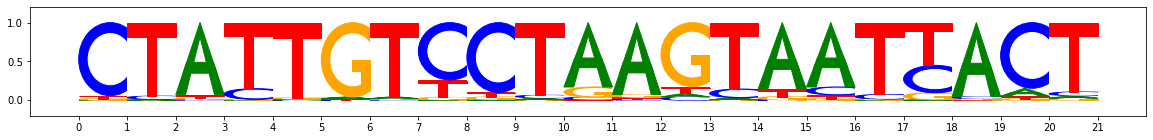

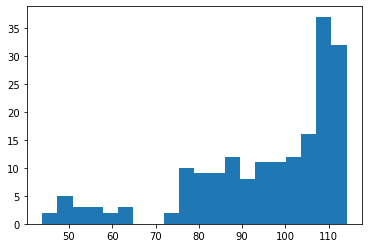

After filtering: numseqlets 172


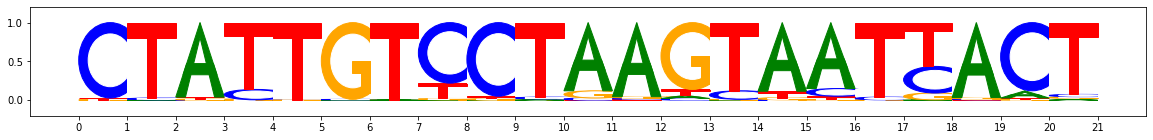

Numseqles: 142


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 142 out of 142 | elapsed:    0.1s finished


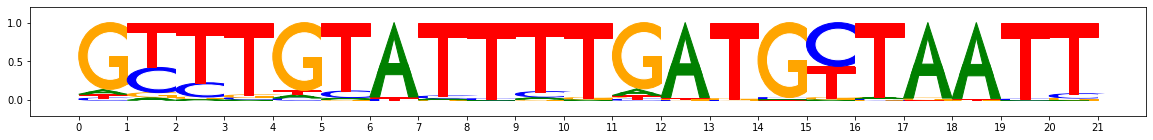

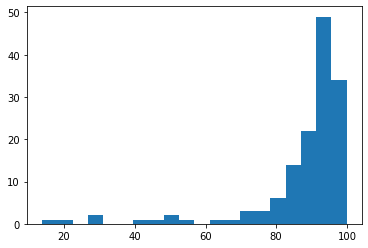

After filtering: numseqlets 133


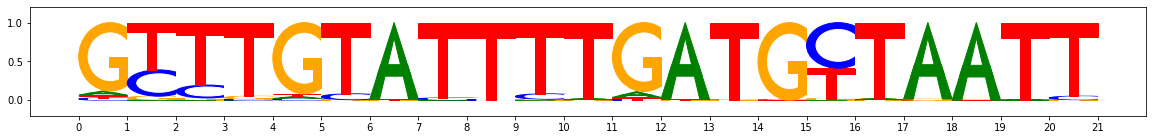

Numseqles: 117


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 117 out of 117 | elapsed:    0.1s finished


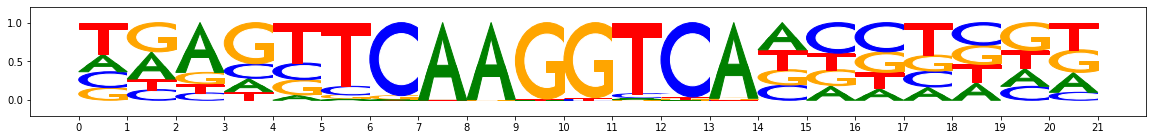

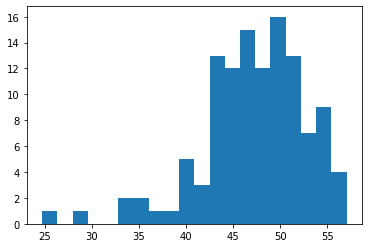

After filtering: numseqlets 116


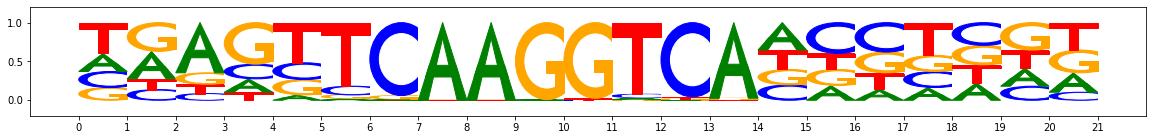

Numseqles: 89


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  89 out of  89 | elapsed:    0.1s finished


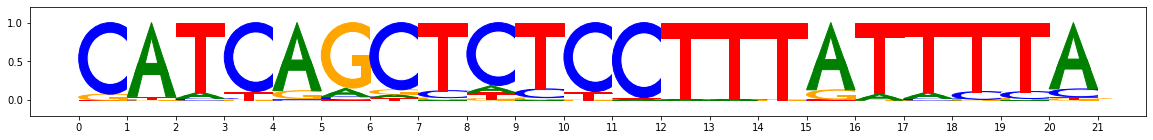

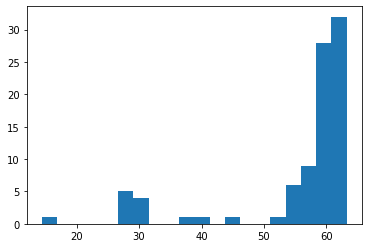

After filtering: numseqlets 79


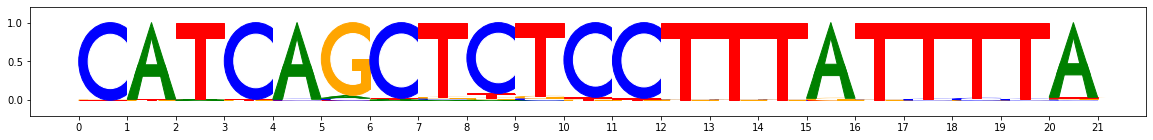

Numseqles: 105


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 105 out of 105 | elapsed:    0.1s finished


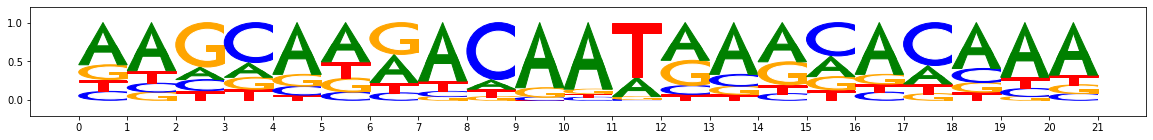

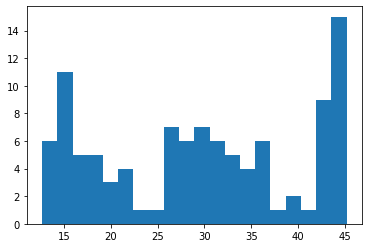

After filtering: numseqlets 80


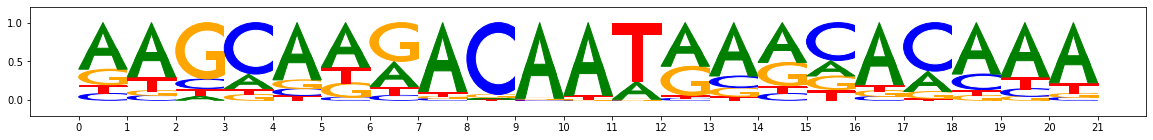

Numseqles: 105


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 105 out of 105 | elapsed:    0.1s finished


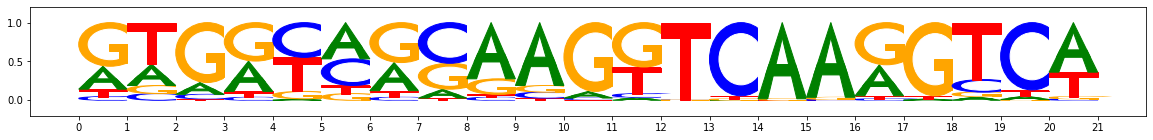

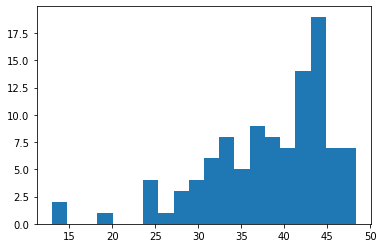

After filtering: numseqlets 101


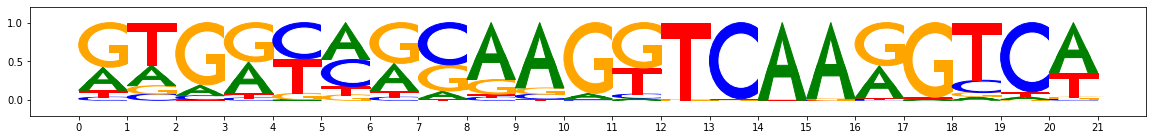

Numseqles: 65


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  46 out of  65 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  65 out of  65 | elapsed:    0.0s finished


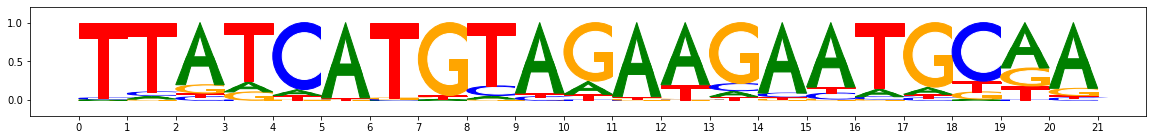

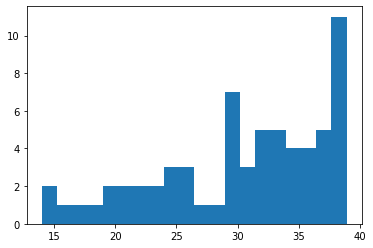

After filtering: numseqlets 59


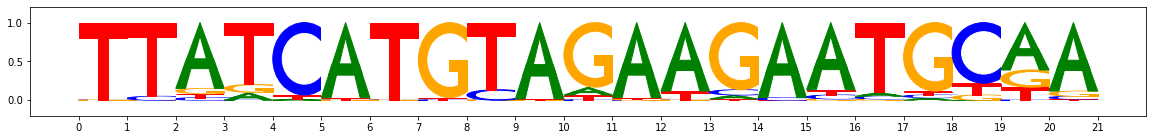

Getting labels
Getting impscores data
Computing fwd sims


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 10220 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 74220 tasks      | elapsed:    6.8s
[Parallel(n_jobs=10)]: Done 163820 tasks      | elapsed:   14.6s
[Parallel(n_jobs=10)]: Done 166985 out of 166985 | elapsed:   14.9s finished


Took 15.108628273010254 s


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:  1.2min finished


Getting impscores data
Computing fwd sims


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 7660 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done 56300 tasks      | elapsed:    5.3s
[Parallel(n_jobs=10)]: Done 145900 tasks      | elapsed:   14.7s
[Parallel(n_jobs=10)]: Done 166985 out of 166985 | elapsed:   16.5s finished


Took 16.7059543132782 s


In [13]:
#Prepare an instance scorer

from modisco.hit_scoring import exemplar_based_hitscoring
reload(exemplar_based_hitscoring)

SCANNING_WINDOW_WIDTH=21
instance_scorer = exemplar_based_hitscoring.prepare_instance_scorer(
    patterns=patterns,
    trim_window_size=SCANNING_WINDOW_WIDTH,
    task_names=["Nanog_profile_wn"],
    bg_freq=np.array([0.27, 0.23, 0.23, 0.27]),
    track_set=track_set)

In [23]:
#transformed_scoretrack, transformed_scoretrack_bestwindowwidth =(
#        (varwidth_coordproducerresults.tnt_results
#         .val_transformer).transform_score_track(
#            np.sum(nanog_profile_wn_contribs[:1000], axis=-1)))

In [32]:
#get coords above a threshold

from collections import defaultdict
reload(modisco.hit_scoring.exemplar_based_hitscoring)
from modisco.hit_scoring import exemplar_based_hitscoring
reload(exemplar_based_hitscoring)

CUTOFF_VALUE = 0.2

#coordinates_to_be_scanned, transformed_scoretrack =\
#    exemplar_based_hitscoring.get_windows_to_be_scanned_interior(
#        transformed_scoretrack=transformed_scoretrack,
#        transformed_scoretrack_bestwindowwidth=transformed_scoretrack_bestwindowwidth,
#        val_transformer=(varwidth_coordproducerresults.tnt_results.val_transformer),
#        scanning_window_width=SCANNING_WINDOW_WIDTH,
#        cutoff_value=CUTOFF_VALUE, plot_save_dir=".")

coordinates_to_be_scanned, transformed_scoretrack =\
    exemplar_based_hitscoring.get_windows_to_be_scanned(
        scanning_window_width=SCANNING_WINDOW_WIDTH,
        contrib_scores=nanog_profile_wn_contribs[:1000],
        val_transformer=varwidth_coordproducerresults.tnt_results.val_transformer,
        cutoff_value=CUTOFF_VALUE)


computing the transformed score track
done computing the transformed score track
Fraction of values above cutoff: 0.151013


In [78]:
from modisco.hit_scoring import exemplar_based_hitscoring
reload(exemplar_based_hitscoring)

print("Number of coordinates:",len(coordinates_to_be_scanned))

(motifmatch_to_coordinates,
 motifmatch_to_coordinatesbyregionidx,
 coord_scan_results) = (
 exemplar_based_hitscoring.scan_and_process_results(
    instance_scorer=instance_scorer, track_set=track_set,
    coordinates=coordinates_to_be_scanned, batch_size=100000))


Number of coordinates: 463866
Getting impscores data
Computing fwd sims


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.7s
[Parallel(n_jobs=10)]: Done 2580 tasks      | elapsed:    7.2s
[Parallel(n_jobs=10)]: Done 64020 tasks      | elapsed:   13.6s
[Parallel(n_jobs=10)]: Done 100000 out of 100000 | elapsed:   17.4s finished


Took 17.522072553634644 s
Getting impscores data
Computing fwd sims


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 10220 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 74220 tasks      | elapsed:    8.4s
[Parallel(n_jobs=10)]: Done 100000 out of 100000 | elapsed:   11.6s finished


Took 11.720226764678955 s
Getting impscores data
Computing fwd sims


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 10220 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 74220 tasks      | elapsed:    8.4s
[Parallel(n_jobs=10)]: Done 100000 out of 100000 | elapsed:   11.3s finished


Took 11.390387535095215 s
Getting impscores data
Computing fwd sims


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 7660 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 39660 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 84460 tasks      | elapsed:   10.3s
[Parallel(n_jobs=10)]: Done 100000 out of 100000 | elapsed:   12.2s finished


Took 12.338349103927612 s
Getting impscores data
Computing fwd sims


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 7660 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 39660 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 63866 out of 63866 | elapsed:    8.5s finished


Took 8.607422113418579 s


Index 0


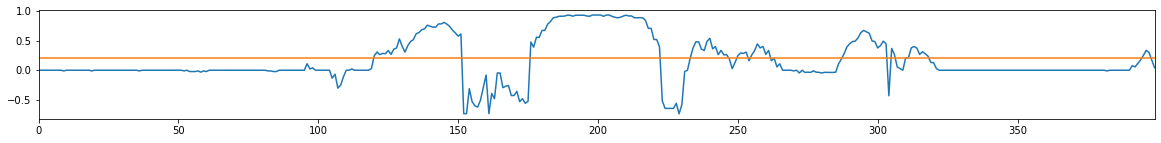

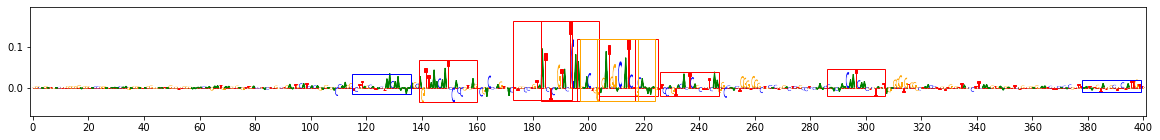

Index 1


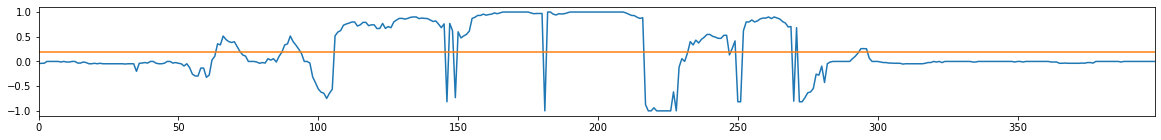

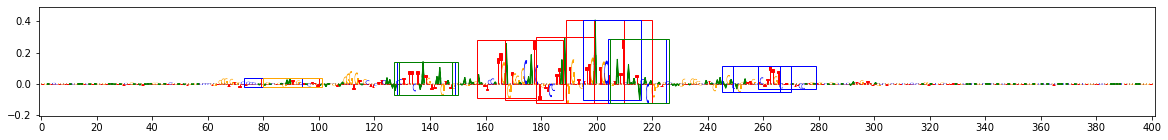

Index 2


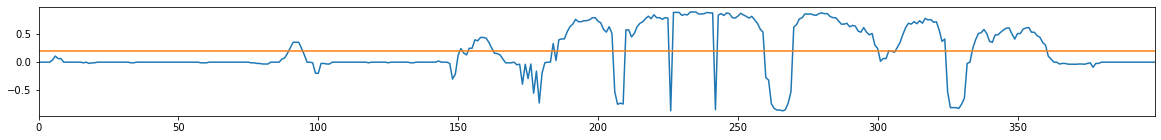

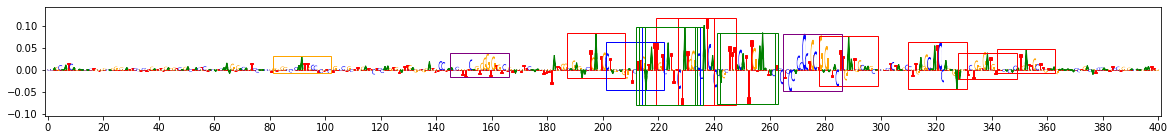

Index 3


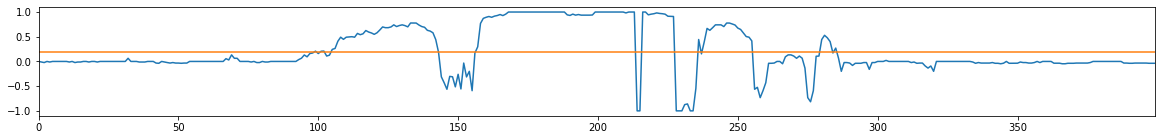

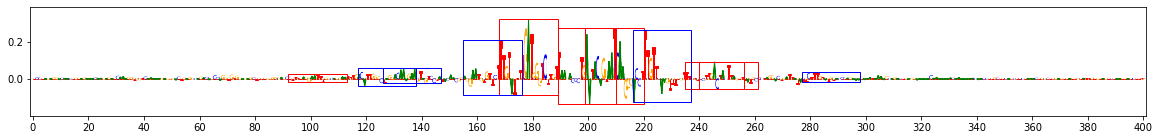

Index 4


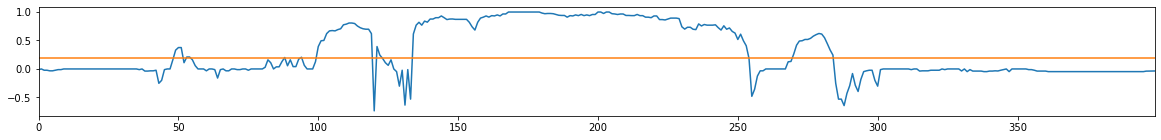

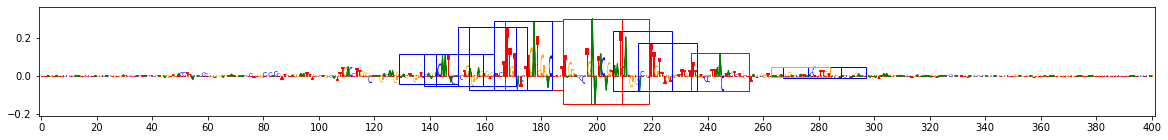

Index 5


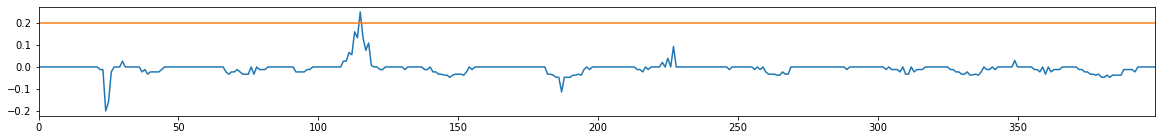

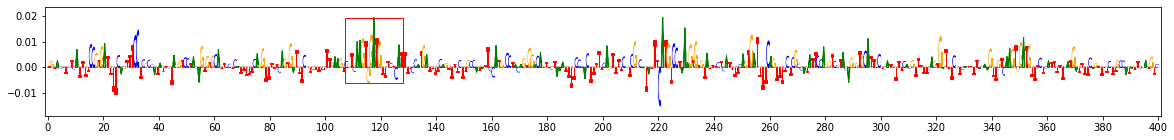

Index 6


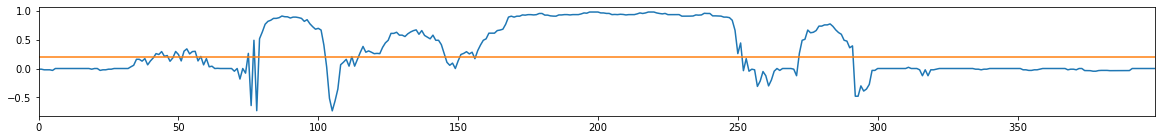

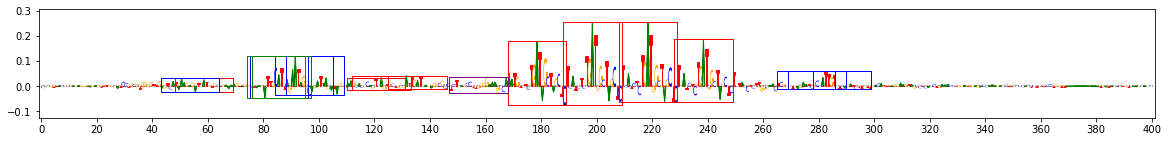

Index 7


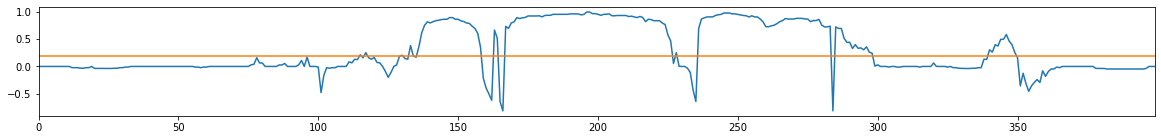

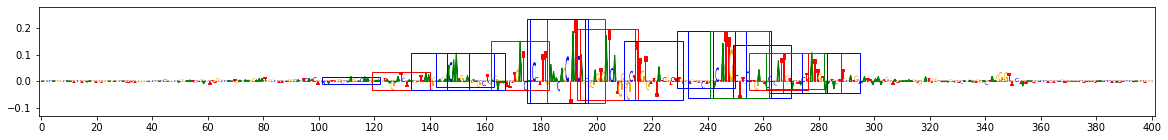

Index 8


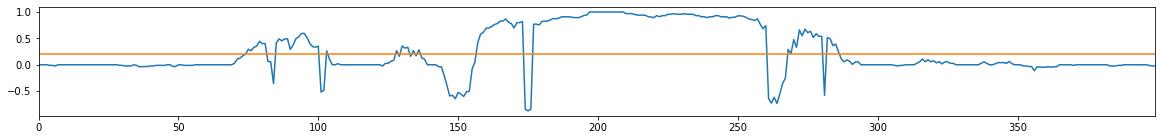

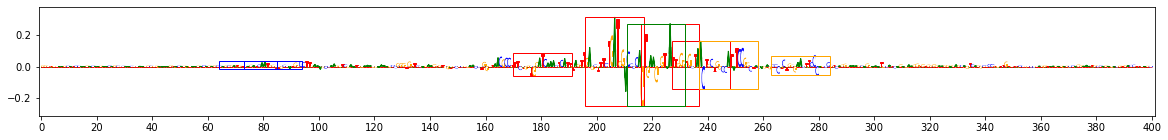

Index 9


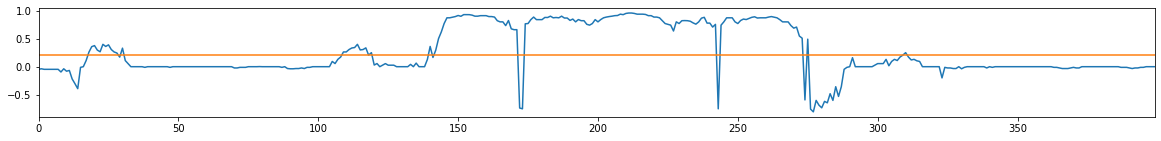

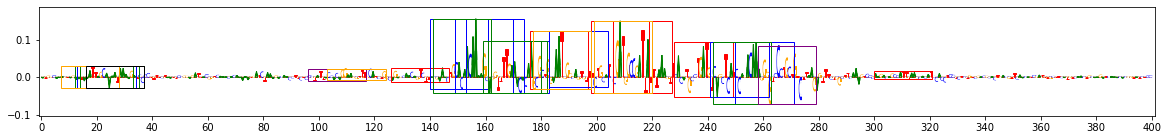

Index 10


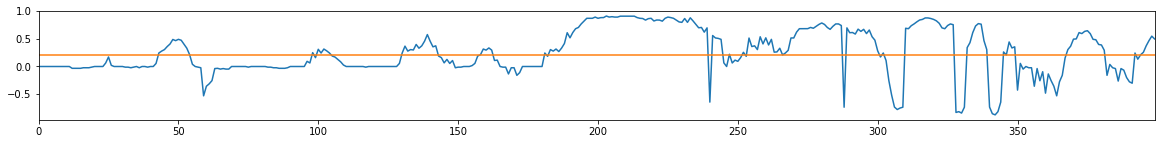

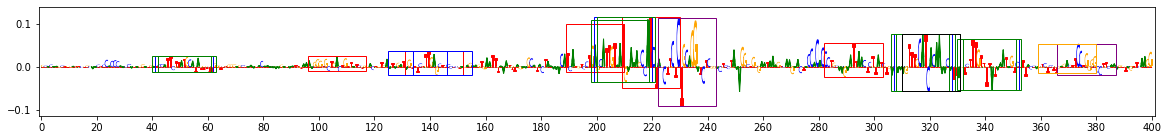

Index 11


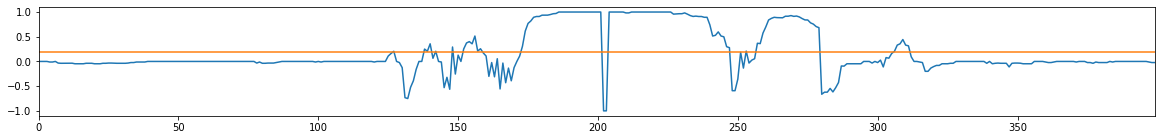

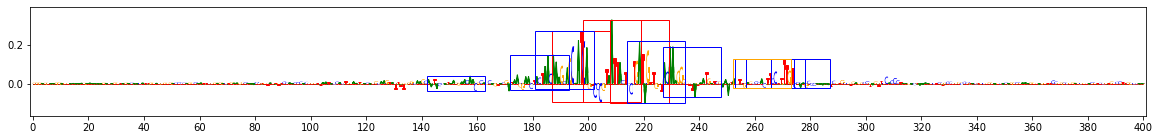

Index 12


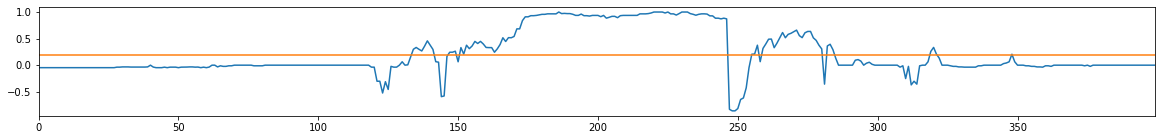

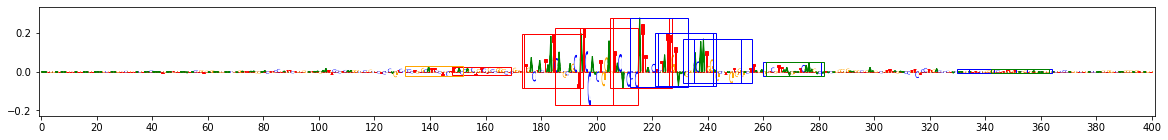

Index 13


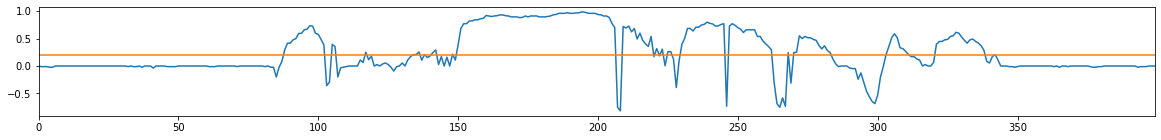

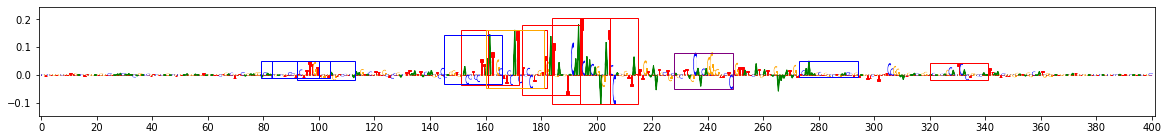

Index 14


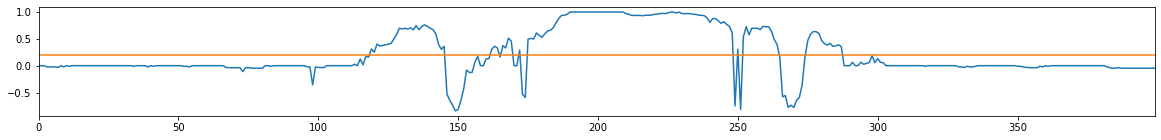

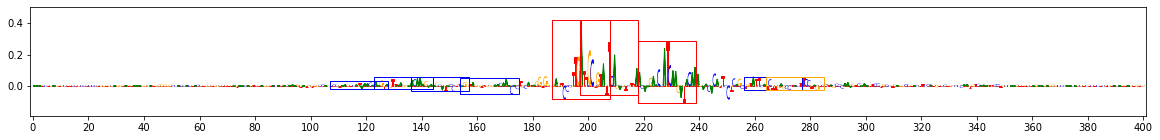

Index 15


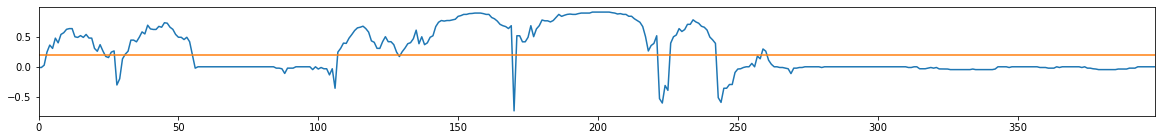

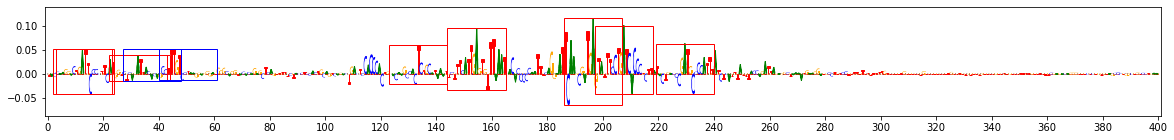

Index 16


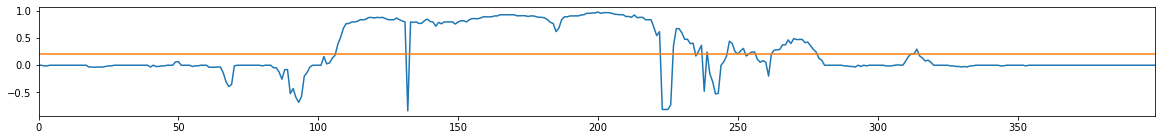

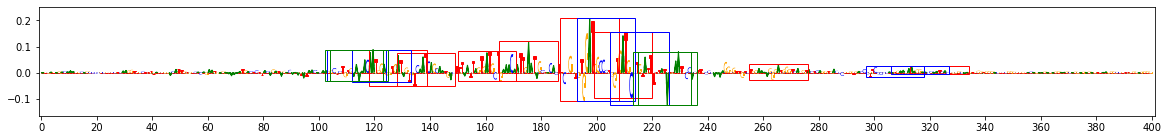

Index 17


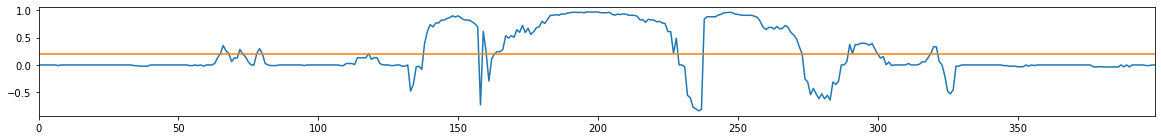

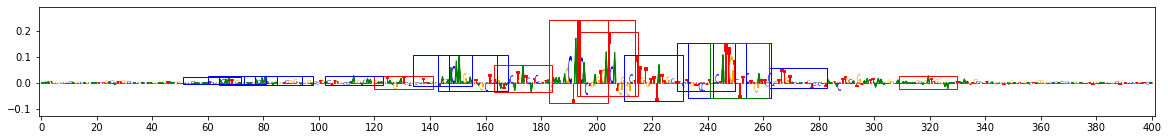

Index 18


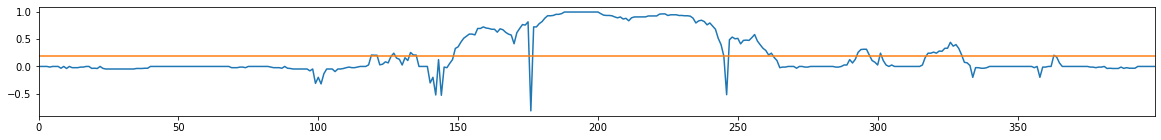

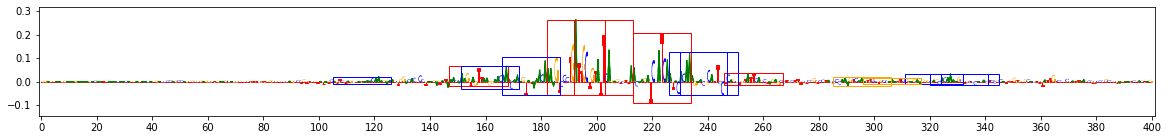

Index 19


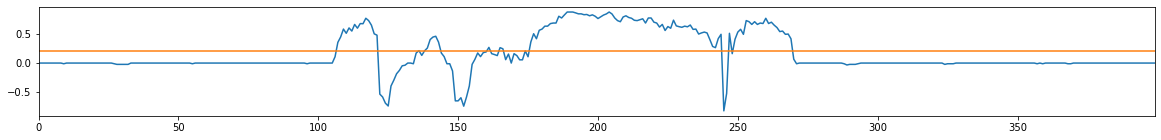

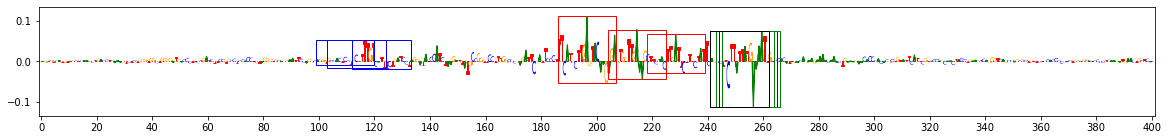

In [76]:
from modisco.visualization import viz_sequence
reload(modisco.visualization.viz_sequence)
reload(modisco.visualization)

def visualize_idx(idx_to_viz):
    TRIM_START = 300
    TRIM_END = 700
    viz_sequence.plot_score_track(transformed_scoretrack[idx_to_viz][TRIM_START:TRIM_END],
                                  threshold=CUTOFF_VALUE)
    viz_sequence.plot_weights(nanog_profile_wn_contribs[idx_to_viz][TRIM_START:TRIM_END],
                              highlight={
                                  'red': [(x.start-TRIM_START, x.end-TRIM_START)
                                          for motifidx in [0] for x in
                                          motifmatch_to_coordinatesbyregionidx[motifidx][idx_to_viz]
                                          if x.start >= TRIM_START and x.end <= TRIM_END],
                                  'blue': [(x.start-TRIM_START, x.end-TRIM_START)
                                           for motifidx in [1,5,7] for x in
                                           motifmatch_to_coordinatesbyregionidx[motifidx][idx_to_viz]
                                          if x.start >= TRIM_START and x.end <= TRIM_END],
                                  'green': [(x.start-TRIM_START, x.end-TRIM_START)
                                            for motifidx in [2,6,10] for x in
                                            motifmatch_to_coordinatesbyregionidx[motifidx][idx_to_viz]
                                           if x.start >= TRIM_START and x.end <= TRIM_END],
                                  'purple': [(x.start-TRIM_START, x.end-TRIM_START) for x in
                                           motifmatch_to_coordinatesbyregionidx[3][idx_to_viz]
                                           if x.start >= TRIM_START and x.end <= TRIM_END],
                                  'orange': [(x.start-TRIM_START, x.end-TRIM_START) for x in
                                           motifmatch_to_coordinatesbyregionidx[4][idx_to_viz]
                                           if x.start >= TRIM_START and x.end <= TRIM_END],
                                  'black': [(x.start-TRIM_START, x.end-TRIM_START) for x in
                                           motifmatch_to_coordinatesbyregionidx[10][idx_to_viz]
                                           if x.start >= TRIM_START and x.end <= TRIM_END],
                              },
                              subticks_frequency=20)

for idx_to_viz in range(20):
    print("Index",idx_to_viz)
    visualize_idx(idx_to_viz)

Motif index 0 
Hits in 1K sequences: 6024
original:


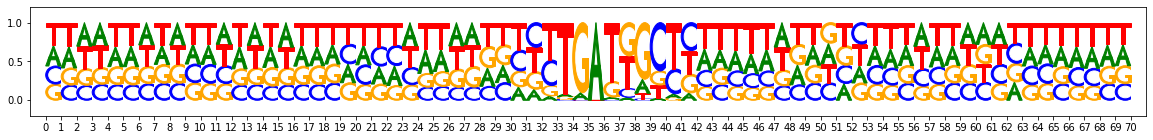

Reconstructed motif from hits:


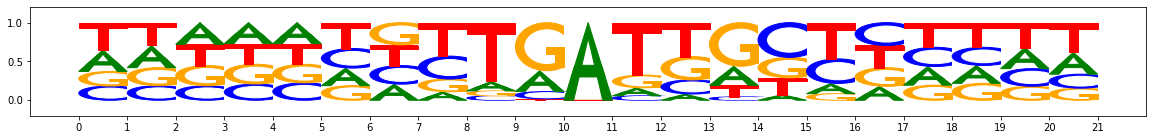

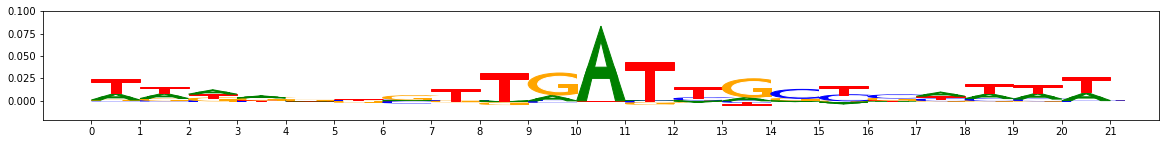

Motif index 1 
Hits in 1K sequences: 3635
original:


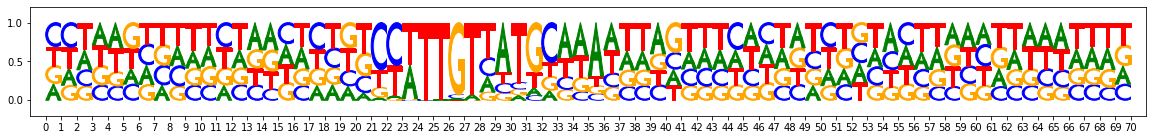

Reconstructed motif from hits:


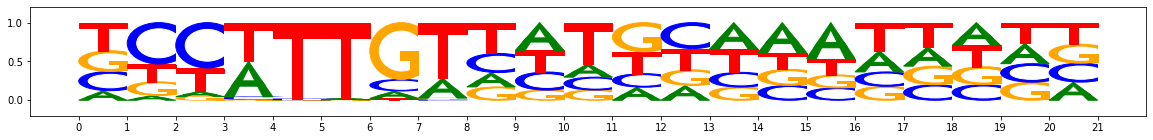

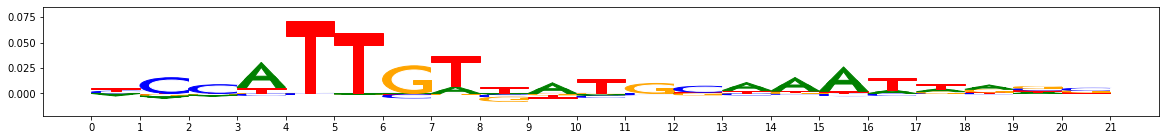

Motif index 2 
Hits in 1K sequences: 1862
original:


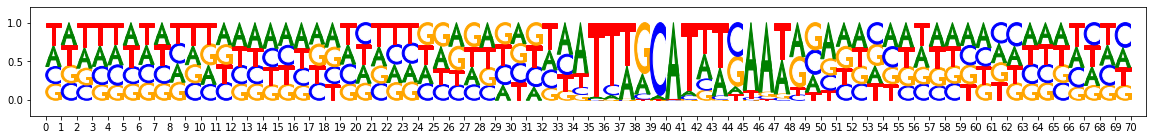

Reconstructed motif from hits:


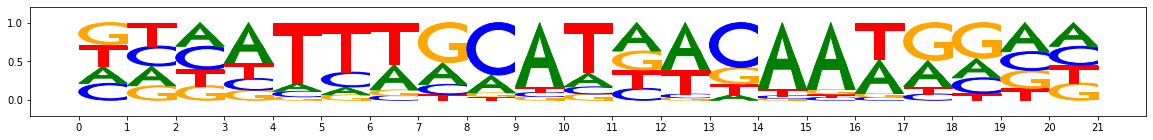

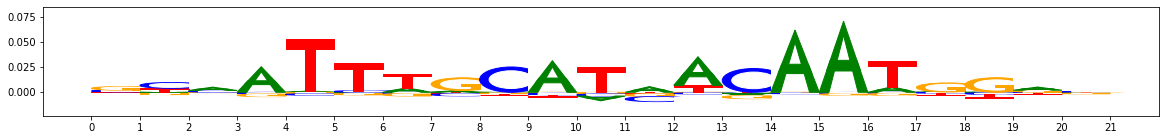

Motif index 3 
Hits in 1K sequences: 981
original:


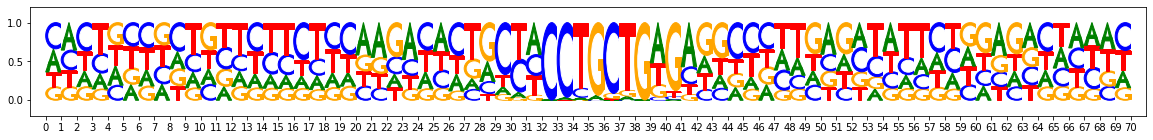

Reconstructed motif from hits:


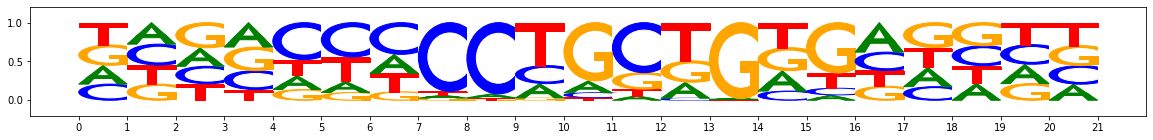

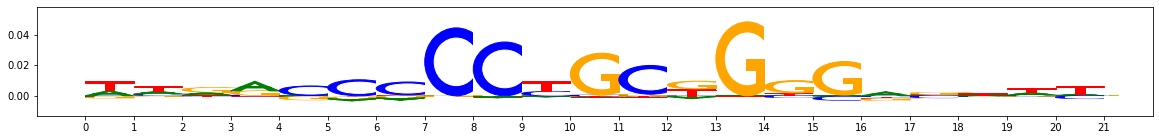

Motif index 4 
Hits in 1K sequences: 950
original:


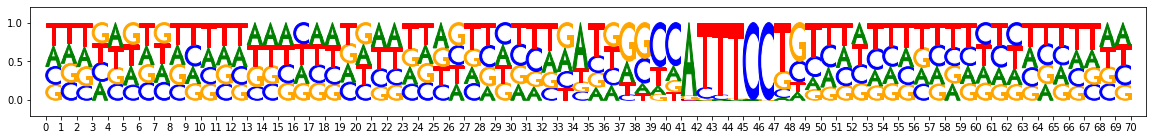

Reconstructed motif from hits:


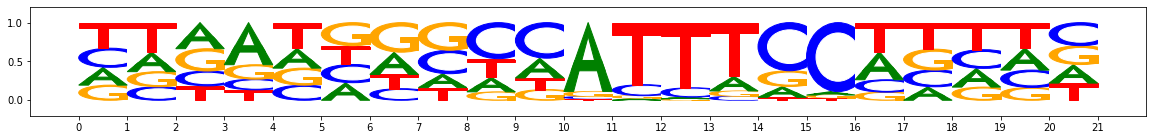

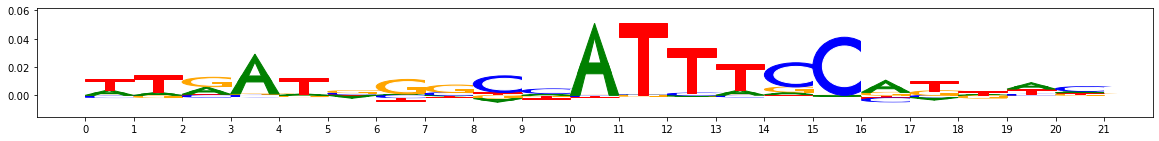

Motif index 5 
Hits in 1K sequences: 1900
original:


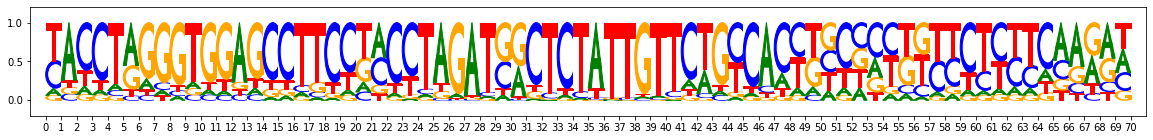

Reconstructed motif from hits:


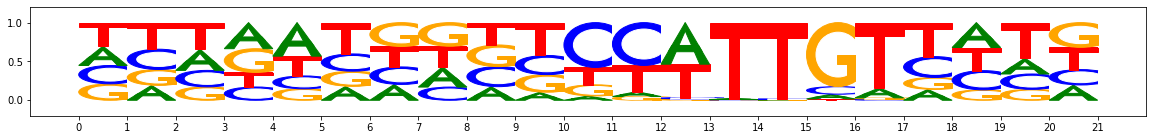

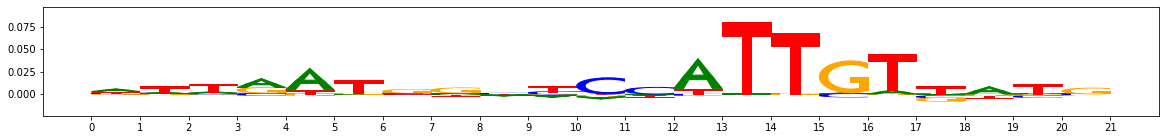

Motif index 6 
Hits in 1K sequences: 1191
original:


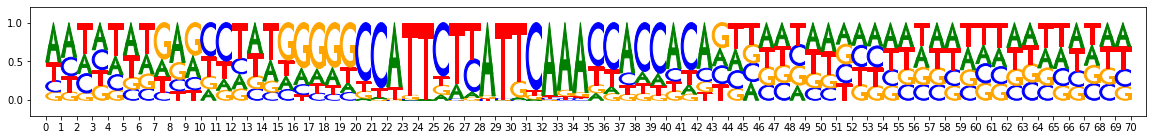

Reconstructed motif from hits:


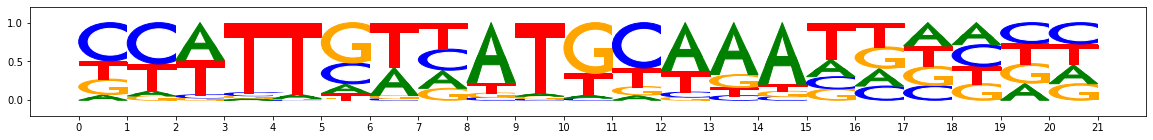

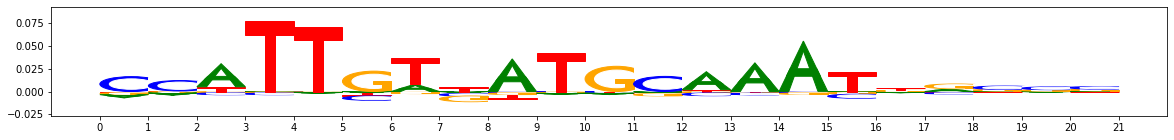

Motif index 7 
Hits in 1K sequences: 1583
original:


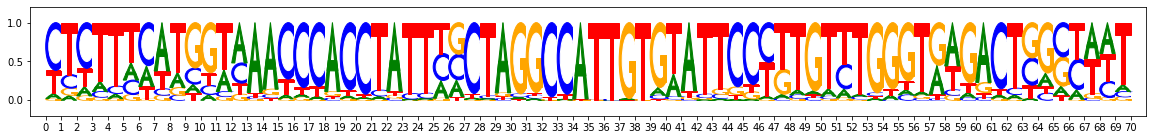

Reconstructed motif from hits:


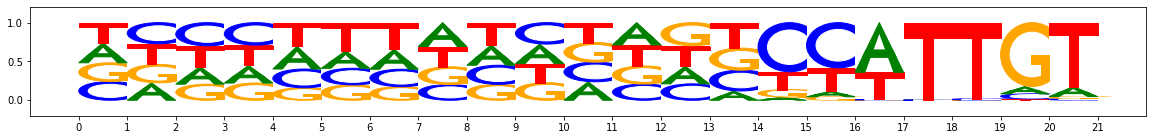

Motif index 8 
Hits in 1K sequences: 1938
original:


Reconstructed motif from hits:


Motif index 9 
Hits in 1K sequences: 428
original:


Reconstructed motif from hits:


Motif index 10 
Hits in 1K sequences: 284
original:


Reconstructed motif from hits:


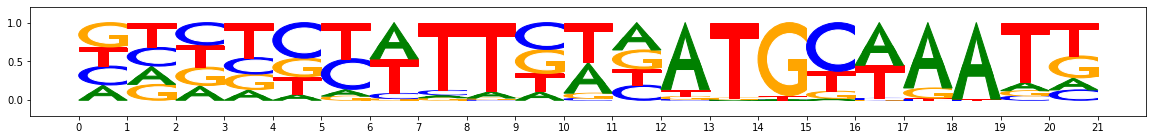

Motif index 11 
Hits in 1K sequences: 792
original:


Reconstructed motif from hits:


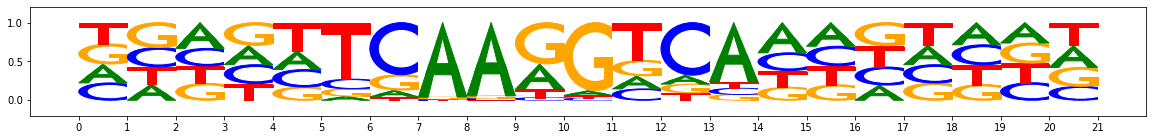

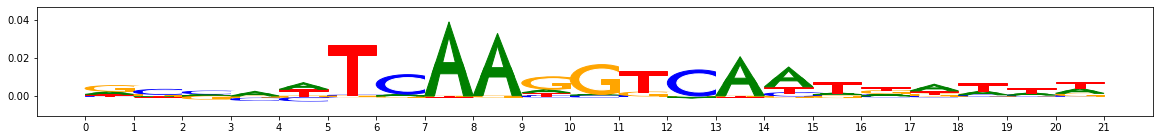

Motif index 12 
Hits in 1K sequences: 268
original:


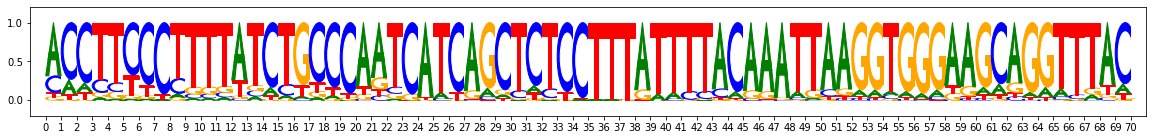

Reconstructed motif from hits:


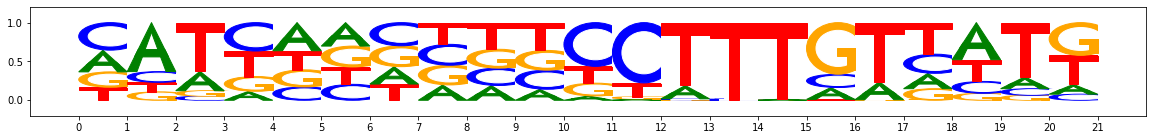

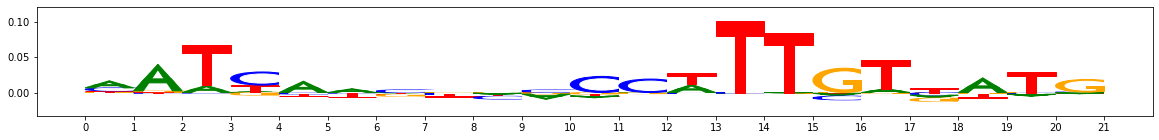

Motif index 13 
Hits in 1K sequences: 6119
original:


Reconstructed motif from hits:


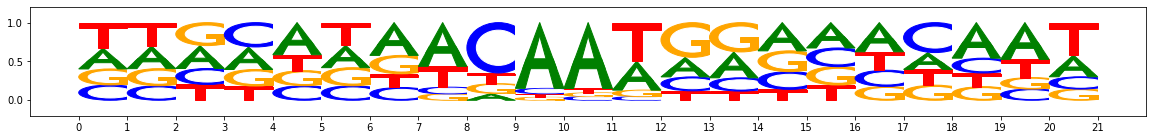

Motif index 14 
Hits in 1K sequences: 2130
original:


Reconstructed motif from hits:


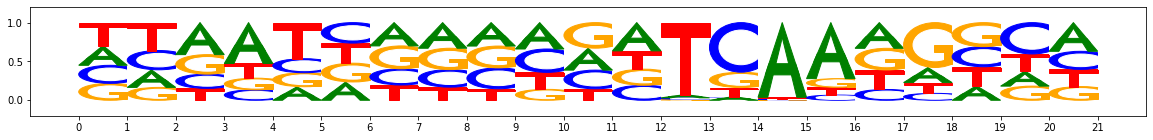

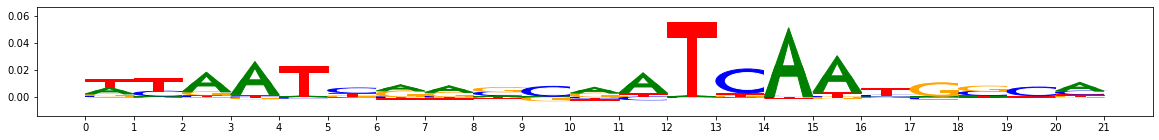

Motif index 15 
Hits in 1K sequences: 734
original:


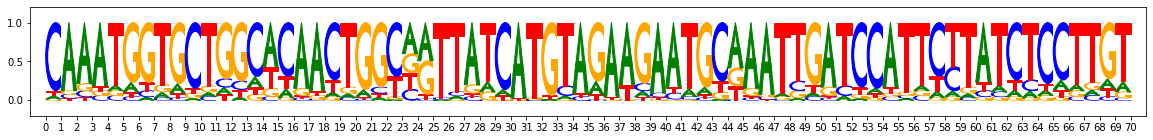

Reconstructed motif from hits:


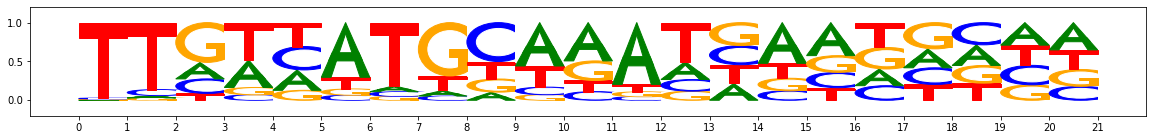

Motif index 16 
Hits in 1K sequences: 433047
original:


IndexError: list index out of range

In [75]:
#viz aggregate imp

for motif_match_idx in range(len(motifmatch_to_coordinates)):
    print("Motif index", motif_match_idx,
          "\nHits in 1K sequences:",len(motifmatch_to_coordinates[motif_match_idx]))
    print("original:")
    viz_sequence.plot_weights(patterns[motif_match_idx]["sequence"].fwd)
    print("Reconstructed motif from hits:")
    viz_sequence.plot_weights(np.mean(
    [
        (onehot_seq[x.example_idx, x.start:x.end]
         if x.is_revcomp==False else
         onehot_seq[x.example_idx, x.start:x.end][::-1,::-1])
        for x in motifmatch_to_coordinates[motif_match_idx]
    ], axis=0))
    viz_sequence.plot_weights(np.mean(
    [
        (nanog_profile_wn_contribs[x.example_idx, x.start:x.end]
         if x.is_revcomp==False else
         nanog_profile_wn_contribs[x.example_idx, x.start:x.end][::-1,::-1])
        for x in motifmatch_to_coordinates[motif_match_idx]
    ], axis=0))
